<a href="https://colab.research.google.com/github/koseogluonur/-Python-for-Data-Science-and-Machine-Learning-/blob/main/Linear_Regression_and_Other_Regression_Types_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basit Doğrusal Regresyon

## Modelleme 

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
from google.colab import files
files.upload()

Saving Advertising.csv to Advertising.csv


{'Advertising.csv': b',TV,radio,newspaper,sales\r\n1,230.1,37.8,69.2,22.1\r\n2,44.5,39.3,45.1,10.4\r\n3,17.2,45.9,69.3,9.3\r\n4,151.5,41.3,58.5,18.5\r\n5,180.8,10.8,58.4,12.9\r\n6,8.7,48.9,75,7.2\r\n7,57.5,32.8,23.5,11.8\r\n8,120.2,19.6,11.6,13.2\r\n9,8.6,2.1,1,4.8\r\n10,199.8,2.6,21.2,10.6\r\n11,66.1,5.8,24.2,8.6\r\n12,214.7,24,4,17.4\r\n13,23.8,35.1,65.9,9.2\r\n14,97.5,7.6,7.2,9.7\r\n15,204.1,32.9,46,19\r\n16,195.4,47.7,52.9,22.4\r\n17,67.8,36.6,114,12.5\r\n18,281.4,39.6,55.8,24.4\r\n19,69.2,20.5,18.3,11.3\r\n20,147.3,23.9,19.1,14.6\r\n21,218.4,27.7,53.4,18\r\n22,237.4,5.1,23.5,12.5\r\n23,13.2,15.9,49.6,5.6\r\n24,228.3,16.9,26.2,15.5\r\n25,62.3,12.6,18.3,9.7\r\n26,262.9,3.5,19.5,12\r\n27,142.9,29.3,12.6,15\r\n28,240.1,16.7,22.9,15.9\r\n29,248.8,27.1,22.9,18.9\r\n30,70.6,16,40.8,10.5\r\n31,292.9,28.3,43.2,21.4\r\n32,112.9,17.4,38.6,11.9\r\n33,97.2,1.5,30,9.6\r\n34,265.6,20,0.3,17.4\r\n35,95.7,1.4,7.4,9.5\r\n36,290.7,4.1,8.5,12.8\r\n37,266.9,43.8,5,25.4\r\n38,74.7,49.4,45.7,14.7\r\n39,

In [ ]:
import pandas as pd
ad = pd.read_csv("Advertising.csv", usecols = [1,2,3,4])
df = ad.copy()
df.head()

In [ ]:
#Bu şekilde de dataframe düzenleme yapabilirsin
#df = df.iloc[:,1:len(df)]

In [ ]:
df.head()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [ ]:
df.isnull().values.any()

False

In [ ]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


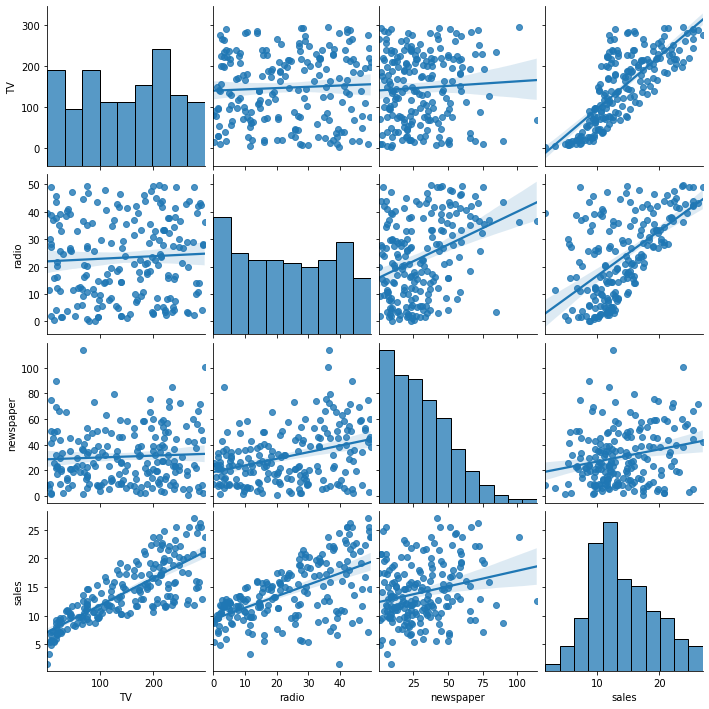

In [ ]:
import seaborn as sns
sns.pairplot(df, kind  ="reg");

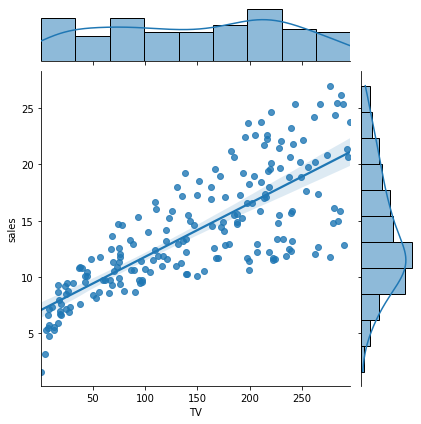

In [ ]:
sns.jointplot(x = "TV", y = "sales", data = df, kind = "reg");

## Statsmodels ile modelleme

In [ ]:
import statsmodels.api as sm;

In [ ]:
X = df[["TV"]]
X[0:5]

In [ ]:
X = sm.add_constant(X)

In [ ]:
X[0:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [ ]:
y = df["sales"]

In [ ]:
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [ ]:
lm = sm.OLS(y,X)

In [ ]:
model = lm.fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 12 Apr 2021   Prob (F-statistic):           1.47e-42
Time:                        09:39:55   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Değişkenleri isimlendirerek yazmak istersek
import statsmodels.formula.api as smf
lm = smf.ols("sales ~ TV", df)
model = lm.fit()
model.summary()

In [ ]:
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [ ]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [ ]:
model.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [ ]:
model.f_pvalue

1.4673897001947095e-42

In [ ]:
print("f_pvalue: ", "%.4f" % model.f_pvalue)

f_pvalue:  0.0000


In [ ]:
print("fvalue: ", "%.2f" % model.fvalue)

In [ ]:
print("tvalue: ", "%.2f" % model.tvalues[0:1])

In [ ]:
model.rsquared_adj

0.6099148238341623

In [ ]:
#Tahmin edilen Değerler
model.fittedvalues[0:5]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [ ]:
#Gerçek Değerler
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [ ]:
print("Sales = " +  str("%.2f" % model.params[0]) + " + TV" + "*" + str("%.2f" % model.params[1]))

Sales = 7.03 + TV*0.05


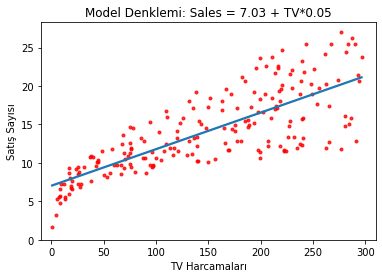

In [ ]:
g = sns.regplot(df["TV"], df["sales"], ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("Model Denklemi: Sales = 7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
import matplotlib.pyplot as plt
plt.xlim(-10,310)
plt.ylim(bottom=0);

In [ ]:
#Sklearn ile hızlıca modelleme
from sklearn.linear_model import LinearRegression

In [ ]:
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X, y)
model.intercept_
model.coef_
Z=[model.intercept_,(model.coef_)]
Z

[7.032593549127695, array([0.04753664])]

In [ ]:
#R square sonucu
model.score(X,y)

0.611875050850071

In [ ]:
#Tahmin Edilen Değerler
model.predict(X)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

## Tahmin

Model denklemi:

Sales = 7.03 + TV*0.04

Örneğin 30 birim TV harcaması olduğunda satışların tahmini değeri ne olur?

In [ ]:
7.03 + 30*0.04

8.23

In [ ]:
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X, y)

In [ ]:
model.predict([[30]])

array([8.45869276])

In [ ]:
#Birden çok sorgulama olduğunda veya soru sorulduğunda liste yaparsın.
yeni_veri = [[5],[90],[200]]

In [ ]:
model.predict(yeni_veri)

array([ 7.27027675, 11.31089119, 16.53992164])

## Artıklar ve Makine Öğrenmesindeki Önemi

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
import statsmodels.formula.api as smf;
lm =smf.ols("sales ~ TV",df)
model = lm.fit()

In [ ]:
mse = mean_squared_error(y, model.fittedvalues)

In [ ]:
mse

10.512652915656753

In [ ]:
import numpy as np
rmse = np.sqrt(mse)

In [ ]:
rmse

3.2423221486546883

In [ ]:
reg.predict(X)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [ ]:
y[0:10]

In [ ]:
k_t = pd.DataFrame({"gercek_y": y[0:10],
                   "tahmin_y": reg.predict(X)[0:10]})

In [ ]:
k_t

In [ ]:
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"]

In [ ]:
k_t

In [ ]:
k_t["hata_kare"] = k_t["hata"]**2

In [ ]:
k_t

In [ ]:
np.sum(k_t["hata_kare"])

92.90350329638102

In [ ]:
np.mean(k_t["hata_kare"])

9.290350329638102

In [ ]:
np.sqrt(np.mean(k_t["hata_kare"]))

In [ ]:
model.resid[0:10]

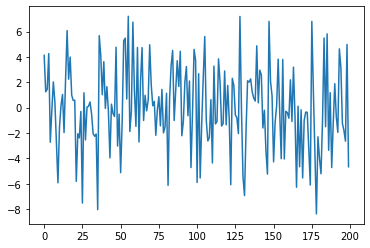

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model.resid);

# Çoklu Doğrusal Regresyon¶


In [ ]:
import pandas as pd
ad = pd.read_csv("Advertising.csv", usecols = [1,2,3,4])
df = ad.copy()
df.head()

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [ ]:
X = df.drop("sales", axis = 1)
y = df["sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)


In [ ]:
X_train.shape

(160, 3)

In [ ]:
y_train.shape

(160,)

In [ ]:
X_test.shape

(40, 3)

In [ ]:
y_test.shape

(40,)

In [ ]:
training = df.copy()

In [ ]:
training.shape

(200, 4)

## Statsmodels

In [ ]:
lm = sm.OLS(y_train, X_train)

In [ ]:
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2935.
Date:                Mon, 12 Apr 2021   Prob (F-statistic):                   1.28e-137
Time:                        10:24:34   Log-Likelihood:                         -336.65
No. Observations:                 160   AIC:                                      679.3
Df Residuals:                     157   BIC:                                      688.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0531      0.001     36.467      0.000       0.050       0.056
radio          0.2188      0.011     20.138      0.000       0.197       0.240
newspaper      0.0239      0.008      3.011      0.003       0.008       0.040
==============================================================================
Omnibus:                       11.405   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.574
Skew:                          -0.432   Prob(JB):                     0.000415
Kurtosis:                       4.261   Cond. No.                         13.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
TV,0.0531,0.001,36.467,0.000,0.050,0.056
radio,0.2188,0.011,20.138,0.000,0.197,0.240
newspaper,0.0239,0.008,3.011,0.003,0.008,0.040


## scikit-learn model

In [ ]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [ ]:
model.intercept_

2.979067338122629

In [ ]:
model.coef_

array([0.04472952, 0.18919505, 0.00276111])

## Tahmin

Model denklemi:

Sales = 2.97 + TV0.04 + radio0.18 + newspaper*0.002

Örneğin 30 birim TV harcaması, 10 birim radio harcamasi, 40 birimde gazete harcaması olduğunda satışların tahmini değeri ne olur?



In [ ]:
yeni_veri = [[30], [10],[40]]
yeni_veri = pd.DataFrame(yeni_veri).T

In [ ]:
model.predict(yeni_veri)

array([6.32334798])

In [ ]:
#Eğitim setinin hatası
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

In [ ]:
rmse

1.644727765644337

In [ ]:
#Test setinin hatası
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

In [ ]:
rmse

1.78159966153345

## Model Tuning / Model Doğrulama

In [ ]:
df.head()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X = df.drop('sales', axis=1)
y = df["sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=144)
lm = LinearRegression() 
model = lm.fit(X_train, y_train)

In [ ]:
np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

1.6748559274650712

In [ ]:
np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

1.6640263686701031

In [ ]:
model.score(X_train, y_train)

0.8971614078663419

In [ ]:
cross_val_score(model, X_train, y_train, cv = 10, scoring = "r2")

array([0.86580772, 0.92273806, 0.90690214, 0.9124702 , 0.69765146,
       0.92654282, 0.92526348, 0.94823778, 0.92941476, 0.69875488])

In [ ]:
cross_val_score(model, X_train, y_train, cv = 10, scoring = "r2").mean()

0.8733783298422942

In [ ]:
np.sqrt(-cross_val_score(model, 
                X_train, 
                y_train, 
                cv = 10, 
                scoring = "neg_mean_squared_error"))

array([1.94167741, 1.17857794, 1.14676306, 1.82238742, 2.97070189,
       1.5424871 , 1.51235118, 1.02817521, 1.73070108, 1.77552332])

In [ ]:
np.sqrt(-cross_val_score(model, 
                X_train, 
                y_train, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean()

1.6649345607872932

In [ ]:
np.sqrt(-cross_val_score(model, 
                X_test, 
                y_test, 
                cv = 10, 
                scoring = "neg_mean_squared_error"))

array([1.00960622, 1.00246182, 2.57280082, 1.73376861, 1.58098281,
       2.4846819 , 2.31458394, 1.5746411 , 1.81611569, 1.31028205])

In [ ]:
np.sqrt(-cross_val_score(model, 
                X_test, 
                y_test, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean()

1.7399924960346644

# PCR Model

In [ ]:
from google.colab import files
files.upload()

In [ ]:
import pandas as pd
import numpy as np
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


In [ ]:
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [ ]:
y = df["Salary"]

In [ ]:
X_ = df.drop(["Salary","League","Division","NewLeague"], axis = 1).astype("float64")

In [ ]:
X_.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0


In [ ]:
X = pd.concat([X_, dms[["League_N", "Division_W","NewLeague_N"]]], axis = 1)
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

training = df.copy()

print("training", training.shape)

X_train (197, 19)
y_train (197,)
X_test (66, 19)
y_test (66,)
training (263, 20)


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
pca = PCA()

In [ ]:
X_reduced_train = pca.fit_transform(scale(X_train))

In [ ]:
X_reduced_train[0:1,:]

array([[-2.49569913e+00, -3.37762397e-01,  7.06391950e-01,
        -1.32791025e+00, -8.21824333e-01, -6.62790677e-01,
        -6.56764789e-01,  3.68093279e-02, -2.03665105e-01,
         1.76134815e-01, -9.20131987e-02,  2.40129020e-01,
        -3.60473661e-03, -3.41246327e-02,  4.32799605e-02,
         1.02996923e-01,  3.70733348e-03,  1.37933445e-03,
        -6.63814471e-03]])

In [ ]:
#Varyanslaral veriyi kümülatif şekilde açıklama oranları
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:5]

array([38.18, 59.88, 70.88, 78.88, 84.18])

In [ ]:
lm = LinearRegression()

In [ ]:
pcr_model = lm.fit(X_reduced_train, y_train)

In [ ]:
pcr_model.intercept_

543.4834416243655

In [ ]:
pcr_model.coef_

array([ 111.13977427,  -29.34209502,   26.29799759,  -38.47549852,
        -56.9200785 ,   54.44779423,   40.77493384,  -23.72746012,
          9.31198164,   13.02031672,   45.58357748,   31.97791627,
         18.93930958, -115.60940171,   24.00382778,  415.70806202,
       -449.51779543,  563.07375399,  302.53718462])

## Tahmin

In [ ]:
y_pred = pcr_model.predict(X_reduced_train)

In [ ]:
y_pred[0:5]

array([377.44484744, 802.19452124, 495.60987745, 112.53177731,
       426.21613066])

In [ ]:
np.sqrt(mean_squared_error(y_train, y_pred))

289.3292825564976

In [ ]:
df["Salary"].mean()

535.9258821292775

In [ ]:
r2_score(y_train, y_pred)

0.5770075250410179

In [ ]:
pca2 = PCA()

In [ ]:
X_reduced_test = pca2.fit_transform(scale(X_test))

In [ ]:
y_pred = pcr_model.predict(X_reduced_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

405.1575364149963

## Model Tuning

In [ ]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:10], y_train)
y_pred = pcr_model.predict(X_reduced_test[:,0:10])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

390.79142556822234


In [ ]:
from sklearn import model_selection

In [ ]:
cv_10 = model_selection.KFold(n_splits = 10,
                             shuffle = True,
                             random_state = 1)

In [ ]:
lm = LinearRegression()

In [ ]:
RMSE = []

In [ ]:
for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lm, 
                                                       X_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

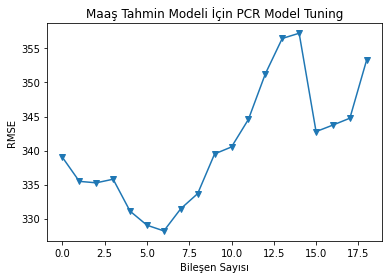

In [ ]:
plt.plot(RMSE, '-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Maaş Tahmin Modeli İçin PCR Model Tuning');

In [ ]:
lm = LinearRegression()

In [ ]:
pcr_model = lm.fit(X_reduced_train[:,0:6], y_train)

In [ ]:
y_pred = pcr_model.predict(X_reduced_train[:,0:6])

In [ ]:
print(np.sqrt(mean_squared_error(y_train, y_pred)))

In [ ]:
y_pred = pcr_model.predict(X_reduced_test[:,0:6])

In [ ]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

393.11987000962233


# PLS

## Model

In [ ]:
from google.colab import files
files.upload()

Saving Hitters.csv to Hitters.csv


{'Hitters.csv': b'AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague\r\n293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NA,A\r\n315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475,N\r\n479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480,A\r\n496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500,N\r\n321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N\r\n594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750,A\r\n185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70,A\r\n298,73,0,24,24,7,3,509,108,0,41,37,12,A,W,121,283,9,100,A\r\n323,81,6,26,32,8,2,341,86,6,32,34,8,N,W,143,290,19,75,N\r\n401,92,17,49,66,65,13,5206,1332,253,784,890,866,A,E,0,0,0,1100,A\r\n574,159,21,107,75,59,10,4631,1300,90,702,504,488,A,E,238,445,22,517.143,A\r\n202,53,4,31,26,27,9,1876,467,15,192,186,161,N,W,304,45,11,512.5,N\r\n418,113,13,48,61,47,4,1512,392,41,205,204,203,N,E,211

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [ ]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD

In [ ]:
pls_model = PLSRegression().fit(X_train, y_train)

In [ ]:
pls_model.coef_

array([[ 35.32916493],
       [ 48.83425857],
       [ 18.50240933],
       [ 39.28117603],
       [ 30.59952998],
       [ 40.03398345],
       [ 16.85990516],
       [ 28.22289896],
       [ 32.73784993],
       [ 22.00875744],
       [ 33.60903032],
       [ 30.39402522],
       [ 25.73279799],
       [ 54.98835148],
       [  6.56590871],
       [ -0.90894359],
       [ 17.60903423],
       [-37.24246339],
       [ 14.69680385]])

## Tahmin

In [ ]:
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
183,328.0,91.0,12.0,51.0,43.0,33.0,2.0,342.0,94.0,12.0,51.0,44.0,33.0,145.0,59.0,8.0,1,0,1
229,514.0,144.0,0.0,67.0,54.0,79.0,9.0,4739.0,1169.0,13.0,583.0,374.0,528.0,229.0,453.0,15.0,1,0,1
286,593.0,152.0,23.0,69.0,75.0,53.0,6.0,2765.0,686.0,133.0,369.0,384.0,321.0,315.0,10.0,6.0,0,1,0
102,233.0,49.0,2.0,41.0,23.0,18.0,8.0,1350.0,336.0,7.0,166.0,122.0,106.0,102.0,132.0,10.0,0,0,0
153,341.0,95.0,6.0,48.0,42.0,20.0,10.0,2964.0,808.0,81.0,379.0,428.0,221.0,158.0,4.0,5.0,1,1,1


In [ ]:
pls_model.predict(X_train)[0:10]

array([[344.91941493],
       [848.87070769],
       [692.93622642],
       [185.56577984],
       [435.49196077],
       [987.49530026],
       [120.63097106],
       [289.9263406 ],
       [663.41886918],
       [817.90486641]])

In [ ]:
y_pred = pls_model.predict(X_train)

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error 
np.sqrt(mean_squared_error(y_train, y_pred))

310.1167593109696

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_train, y_pred)

0.5140424486535481

In [ ]:
y_pred = pls_model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

398.09956327448526

## Model Tuning

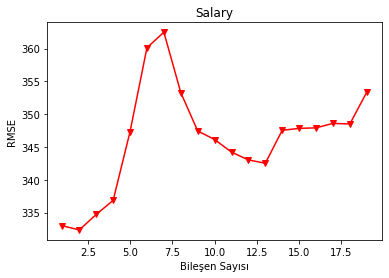

In [ ]:
from sklearn import model_selection
import matplotlib.pyplot as plt
#CV
cv_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)


#Hata hesaplamak için döngü
RMSE = []

for i in np.arange(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*cross_val_score(pls, X_train, y_train, cv=cv_10, scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

#Sonuçların Görselleştirilmesi
plt.plot(np.arange(1, X_train.shape[1] + 1), np.array(RMSE), '-v', c = "r")
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Salary');

In [ ]:
pls_model = PLSRegression(n_components = 2).fit(X_train, y_train)

In [ ]:
y_pred = pls_model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

398.09956327448526

# Ridge Regresyon

## Model

In [ ]:
from google.colab import files 
files.upload()

Saving Hitters.csv to Hitters.csv


{'Hitters.csv': b'AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague\r\n293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NA,A\r\n315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475,N\r\n479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480,A\r\n496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500,N\r\n321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N\r\n594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750,A\r\n185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70,A\r\n298,73,0,24,24,7,3,509,108,0,41,37,12,A,W,121,283,9,100,A\r\n323,81,6,26,32,8,2,341,86,6,32,34,8,N,W,143,290,19,75,N\r\n401,92,17,49,66,65,13,5206,1332,253,784,890,866,A,E,0,0,0,1100,A\r\n574,159,21,107,75,59,10,4631,1300,90,702,504,488,A,E,238,445,22,517.143,A\r\n202,53,4,31,26,27,9,1876,467,15,192,186,161,N,W,304,45,11,512.5,N\r\n418,113,13,48,61,47,4,1512,392,41,205,204,203,N,E,211

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)

In [ ]:
#Alfa lambda sembolünü temsil eder.
ridge_model

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

In [ ]:
10**np.linspace(10,-2,100)*0.5 

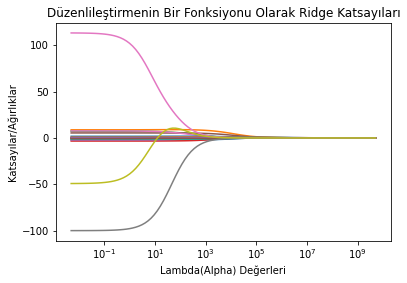

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
lambdalar = 10**np.linspace(10,-2,100)*0.5 

ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train) 
    katsayilar.append(ridge_model.coef_) 
    

    
ax = plt.gca()
ax.plot(lambdalar, katsayilar) 
ax.set_xscale('log') 

plt.xlabel('Lambda(Alpha) Değerleri')
plt.ylabel('Katsayılar/Ağırlıklar')
plt.title('Düzenlileştirmenin Bir Fonksiyonu Olarak Ridge Katsayıları');

## Tahmin

In [ ]:
y_pred = ridge_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

357.05179222828434

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.4110844905067612

## Model Tuning

In [ ]:
lambdalar = 10**np.linspace(10,-2,100)*0.5 

In [ ]:
lambdalar[0:5]

In [ ]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas = lambdalar, 
                   scoring = "neg_mean_squared_error",
                   normalize = True)

In [ ]:
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=True,
        scoring='neg_mean_squared_error', store_cv_values=False)

In [ ]:
ridge_cv.alpha_

0.7599555414764666

In [ ]:
ridge_tuned = Ridge(alpha = ridge_cv.alpha_, 
                   normalize = True).fit(X_train,y_train)

In [ ]:
np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test)))

386.6826429756415

# Lasso Regresyon

## Model

In [10]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [11]:
from sklearn.linear_model import Lasso

In [12]:
lasso_model = Lasso(alpha = 0.1).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8249174.751388069, tolerance: 3898.6869563806586
  positive)


In [13]:
lasso_model

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [14]:
lasso_model.coef_

array([-1.72206506e+00,  8.56210197e+00,  6.91175137e+00, -3.13240128e+00,
       -2.00771676e+00,  5.36159035e+00,  8.86871593e+00, -1.69520371e-01,
       -5.58121413e-02, -3.53962588e-01,  1.70961000e+00,  6.40603469e-01,
       -6.58519895e-01,  2.60093222e-01,  2.78717030e-01, -5.92690965e-01,
        1.12659630e+02, -9.99652090e+01, -4.81289395e+01])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5469.558741439134, tolerance: 3898.6869563806586
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6540.147679522634, tolerance: 3898.6869563806586
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4001.7561374865472, tolerance: 3898.6869563806586
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5357.774

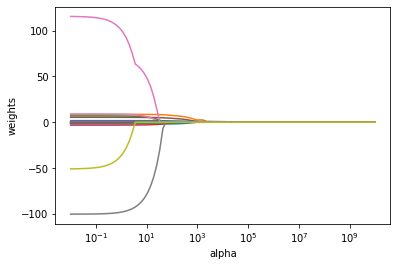

In [16]:
lasso = Lasso()
lambdalar = 10**np.linspace(10,-2,100)*0.5 
katsayilar = []

for i in lambdalar:
    lasso.set_params(alpha=i)
    lasso.fit(X_train, y_train)
    katsayilar.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(lambdalar*2, katsayilar)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights');

## Tahmin 

In [17]:
lasso_model.predict(X_test)

array([ 613.88833029,  701.97056731, 1005.55539526,  414.08312603,
        399.18417127,  344.71444139,  664.86990217,  451.60757   ,
        914.64492066,  644.67006406,  691.60613554,  884.71702368,
        210.04523766,  446.12527252,  262.94922087,  499.22332142,
        805.2275034 ,   43.49230343, 1250.49322312,  316.34470193,
        422.96656686,  743.29944548,  572.90774248,  655.15609074,
        618.96407069,  200.75845796,  882.64622066,  254.06366112,
        430.25494812,   84.17391461,  143.60312305,  130.61554   ,
        363.74498233,  461.7321162 ,  273.42345417,  244.49816262,
       1324.62748553,  107.89909718,  135.63065031,  242.72630885,
         51.70024086,  297.57598929,  586.86143037,  398.85227639,
        763.99543074,  690.10003532,  344.06272851,  247.43966241,
        255.13234043,  662.89091837,  765.66189   ,  313.57347726,
        765.84996179,  189.77235179,  283.98765436,  589.95238974,
        663.31166365,  803.29524626,  164.99767232, 1170.24294

In [18]:
y_pred = lasso_model.predict(X_test)

In [20]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

356.7545270148768

## Model Tuning

In [21]:
from sklearn.linear_model import LassoCV

In [22]:
lasso_cv_model = LassoCV(alphas = None, 
                         cv = 10, 
                         max_iter = 10000, 
                         normalize = True)

In [23]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=10000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [24]:
lasso_cv_model.alpha_

0.39406126432470073

In [25]:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_)

In [26]:
lasso_tuned.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8252823.943523982, tolerance: 3898.6869563806586
  positive)


Lasso(alpha=0.39406126432470073, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [27]:
y_pred = lasso_tuned.predict(X_test)

In [29]:
np.sqrt(mean_squared_error(y_test,y_pred))

356.52263769583686

# ElasticNet Regresyonu

In [30]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)



In [31]:
from sklearn.linear_model import ElasticNet

In [32]:
enet_model = ElasticNet().fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8487984.799367338, tolerance: 3898.6869563806586
  positive)


In [33]:
enet_model.coef_

array([ -1.86256172,   8.70489065,   5.10426375,  -2.89875799,
        -1.28642985,   5.24343682,   6.04480276,  -0.14701495,
        -0.21566628,  -0.7897201 ,   1.80813117,   0.80914508,
        -0.61262382,   0.26816203,   0.27172387,  -0.36530729,
        19.2186222 , -31.16586592,   8.98369938])

In [34]:
enet_model.intercept_

-6.465955602112217

## Tahmin

In [35]:
enet_model

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [36]:
enet_model.predict(X_test)

array([ 577.79111731,  617.33202224, 1031.39113156,  364.95861575,
        489.51894393,  300.74185842,  604.522666  ,  465.34678732,
        901.44473965,  703.20357123,  702.9157117 ,  931.50283407,
        184.87939803,  385.14973787,  325.38944176,  546.99346574,
        774.28001821,  101.83114992, 1250.86758812,  370.67651244,
        442.05734523,  781.17288513,  578.63736538,  609.31927808,
        608.31719597,  227.46556223,  921.85505228,  301.1202457 ,
        386.31721051,  133.61143326,  162.28505608,   88.29793182,
        359.9068418 ,  422.51268445,  265.8663769 ,  355.70450908,
       1329.36312363,  125.05506935,   82.74580002,  269.17483075,
        117.13319397,  274.13484779,  648.4957249 ,  409.47065999,
        846.27919406,  712.04817644,  341.10596674,  368.24259678,
        305.70477656,  680.05724792,  716.13640636,  295.93204262,
        773.06445823,  249.28224916,  221.46794589,  541.2713245 ,
        611.50212372,  770.80228024,  168.45143906, 1159.05660

In [37]:
y_pred = enet_model.predict(X_test)

In [38]:
np.sqrt(mean_squared_error(y_test, y_pred))

357.1676548181244

In [40]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.41070222469326934

## Model Tuning

In [41]:
from sklearn.linear_model import ElasticNetCV

In [42]:
enet_cv_model = ElasticNetCV(cv = 10, random_state = 0).fit(X_train, y_train)

In [43]:
enet_cv_model.alpha_

5230.7647364798695

In [44]:
enet_cv_model

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto', random_state=0,
             selection='cyclic', tol=0.0001, verbose=0)

In [45]:
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train,y_train)

In [46]:
y_pred = enet_tuned.predict(X_test)

In [47]:
np.sqrt(mean_squared_error(y_test, y_pred))

394.15280563218795